In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from scipy.interpolate import interp1d

from bokeh.io import curdoc, show
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Slider, Legend
from bokeh.plotting import Figure, figure, output_file, save
from bokeh import palettes

import json
import seaborn as sns

# Explainer notebook for NYC Stop-and-frisk project
Link to webpage:
By Øyvind Andreas Winton (s160602).

## Structure of the explainer notebook.
The notebook is structured in two parts. The first is the qualitative part, addressing the 7 bullet points on the Github Wiki. The second part is the data analysis and visualization part, which will be referred to in the text.

## 1. Motivation
**What is your dataset?**
I have used the NYPD NYC stop-and-frisk dataset, which can be accessed on [this link](https://data.cityofnewyork.us/Public-Safety/The-Stop-Question-and-Frisk-Data/ftxv-d5ix). It covers registered police stops by the NYPD from 2003 to 2016, totaling in around 5 million lines with around 100 attributes.

**Why did you choose this particular dataset?**
I read some articles about racial profiling in policing, and the matter of racial profiling during the stop-and-frisk initiatives of the Bloombeg administration came up. On the open source data base for NYC I then saw the data set, and figured that it would be interesting to work with, and see if I could find something in the data that indicated a racial bias in how these stops were performed.

**What was your goal for the end user's experience?**
My initial goal was to present a website where interactive exploration of the data (along with some subtle guiding) would start with making the user ask the question of how to find signs of racial profiling, and then explore the data and find the indications of this in the data. However due to time constraints and no html/webpage programming experience, I saw it necessary to downscale my ambitions for interactivity and make a more author-driven magazine-style approach, where the user is guided through my analysis of the data.

## 2. Basic stats
**Write about your choices in data cleaning and preprocessing.**
I chose the discard the first three years of data, due to inconsistencies in what attributes were reported and how. From 2006 and forward the approach was more homogeneous, allowing for easier concatenation of all the data. To simplify the racial aspect I chose to combine sub groups of hispanics into one, and to discard all entries not regarding the races black, white and hispanic. Further, some small cleaning like removing entries with nan appearing in the columns I am interested in, fixing inconsistencies in spelling of city names and the like, was performed subsequently. Only a subset of attributes were kept, regarding the person (age, sex, race), time and place (precinct, city and year), and other relevant attributes (was an arrest made, was force used, was the suspect frisked or searched, was a pistol found on the suspect).

**Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.**
The cleaned and combined data set has 3.880.159 lines and 20 attributes. The two first figures in this notebook display a lot of information. The first figure shows the temporal evolution of police stops from 2006 through 2016, where a dramatic decrease is seen after 2011. The second figure shows the amount of stops for each race per 1000 inhabitants of that race, and a very clear racial pattern is seen here. The largest difference is seen for Manhattan, where of 1000 black residents in Manhattan, 350 black persons were stopped on the street, compared to about only around 30 out of 1000 white residents.

## 3. Data Analysis.
**Describe your data analysis and explain what you've learned about the dataset.**
The data analysis process has been mainly focused around the grouping and summing of various attributes, grouped on each race. I have been looking for differences in frisk rates, search rates, arrest rates and use of force for each race, as well as looked at the geographical distribution of stops compared to the background population.
I have found that there is a large a disparity between the different races in terms of how many are stopped per year compared to the background populaiton composition of the location they were stopped in. I have further found that white people are less prone to be frisked and less prone to be subject to force use by the police. However, white people are slightly more prone to be arrested once stopped. This last fact indicates that an innocent black person has a higher chance of being stopped on the street than an innocent white person

**Talk about your machine-learning**
I have applied logistic regression and random forest classification to classify whether an arrest is made or not, based on different attributes. I used a balanced dataset (downsampling, due to the large amount of data) so that the training and test data sets contained equally many instances of arrests and non-arrests. I used the models not for prediction, but to understand what sensitivities the models learned for each attribute, and found in particular that the logistic regression model had negative coefficients for black males with criminal-looking clothing: this means that these attributes draw the model towards predicting no arrest. The interpretation of this is that black males wearing criminal-looking clothing are more often stopped innocently without resulting in arrest, than people with other attributes.

I would have liked to take the machine learning even further, and use logistic regression to understand the relationships between more variables. One possibility would be to clean the whole dataset (with all 100+ attributes) and feed it to the logistic regression, trying to make predictions on various attributes. This could lead to the discovery of more interesting connections than I had the time/ability to do in this project.

## 4. Genre.
**Which tools did you use from visual narrative?** I used a 
- consistent visual platform. This gives a sense of coherence in the presentation, and highlights that the presented content is about the same topic.
- feature distinction. This puts focus on the features that I want to emphasize
- motion/zooming/animated transitions. This draws attention to new parts, and gives the user a sense of dynamic interactivity.

**Which tools did you use from narrative structure?**
I used
- linear ordering. This makes it easy for the author to present the story in a fashion so that the reader follows it in that way.
- hover highlighting/details (Folium map). This lets the reader see the names of the areas and more detailed numbers, where the colors main objective is to give an overview.
- filtering/selection/search (Bokeh plots). This lets the reader compare different years more easily than on the graph.
- navigation buttons (in the top). This lets the user get some more details of the data processing and background if interested, and navigative easily back to the mainpage. 
- very limited interactivity. This is more a consequence of limited experience and time, which was instead used on the content. 
- captions/headlines. This gives a quick overview, and makes skimming of sections more easy, as the headlines will guide the user to the parts they are interested in. 
- introductory text and summary. This sets the stage of the question, and frames the analysis, while helping the user get the key points of the contents afterwards. 

## 5. Visualizations.

I have made use of four different types of visualizations, which will be listed below.

**Map**. The maps give an indication of the geographical distribution of crime, and help set the context of the analysis. While the rest of the analysis is not centered around the spatial attributes, a map is a still a way to set the stage of a presentation of data analysis. While limited, the interactivity does allow the user to get some more details of crime numbers, and learn the names of the boroughs of NYC.

**Bar plots**. These plots give a clear indication of differences in race for the analyzed attribute. These are temporally aggregated, and thus blankly answers the question "what is the rate of XYZ for each race?".

**Line plots**. These plots are similar to the bar plots, but grouped by year. This allows to show if there is a temporal evolution in rates, and displays whether the temporal evolution for the different races are common.

**Bokeh bar plots**. These plots are a interactive combinations of the two above, and allows the user to easily compare the rates of each rates for different years.

*Note:. While I had prepared to make embedded iframes with the visualizations onsite, I found out in the webpage development that the tool I chose to build the webpage did not support embedded code without paying for a premium access.*

## 6. Discussion
**What went well?**. There were interesting temporal and racial variation to analyse and present, and these were well presented using classic pyplot figures.

**What is still missing? What could be improved? Why?** I would have liked to present a more interactive webpage, where the user did more data exploration than just reading. This could also have allowed for new hypotheses to be made, besides the points I chose to investigate.

I have been very careful with making conclusions as I have limited experience as to what is necessary to deem something statistically significant. Further, I have been careful with concluding anything about casuality. Finally, this project touches upon emotionally and politically sensitive topics of race, identity and police brutality, which has to addressed carefully. I have tried to remain objective, and just stating what the data is saying, without either accusing certain races of being represented higher in crimes, nor accusing the police system of structural racism. More qualified people with more experience in the field should be left with those cases. This tip-toeing has limited what I feel confident about saying in the analysis, and thus limits my ability to present a good story.

There is a large potential in continuing with the machine learning part, to explore other relationships than I have.

## 7. Contributions
Due to field work I chose to work on the project alone, as I knew there was an overarching chance that I had to leave during the beginning of May. All the work in this notebook and on the webpage is thus done by me (Øyvind Andreas Winton. s160602).

## Loading and cleaning data

In [2]:
cols = ['age', 'sex', 'pistol', 'year', 'pct', 'arstmade', 'frisked', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'searched', 'race', 'city', 'cs_cloth']

In [3]:
#df2003 = pd.read_csv('crime/sqf-2003.csv', skipinitialspace=True, usecols=cols)
#df2004 = pd.read_csv('crime/sqf-2004.csv', skipinitialspace=True, usecols=cols)
#df2005 = pd.read_csv('crime/sqf-2005.csv', skipinitialspace=True, usecols=cols)
df2006 = pd.read_csv('crime/sqf-2006.csv', skipinitialspace=True, usecols=cols)
df2007 = pd.read_csv('crime/sqf-2007.csv', skipinitialspace=True, usecols=cols)
df2008 = pd.read_csv('crime/sqf-2008.csv', skipinitialspace=True, usecols=cols)
df2009 = pd.read_csv('crime/sqf-2009.csv', skipinitialspace=True, usecols=cols)
df2010 = pd.read_csv('crime/sqf-2010.csv', skipinitialspace=True, usecols=cols)
df2011 = pd.read_csv('crime/sqf-2011.csv', skipinitialspace=True, usecols=cols)
df2012 = pd.read_csv('crime/sqf-2012.csv', skipinitialspace=True, usecols=cols)
df2013 = pd.read_csv('crime/sqf-2013.csv', skipinitialspace=True, usecols=cols)
df2014 = pd.read_csv('crime/sqf-2014.csv', skipinitialspace=True, usecols=cols)
df2015 = pd.read_csv('crime/sqf-2015.csv', skipinitialspace=True, usecols=cols)
df2016 = pd.read_csv('crime/sqf-2016.csv', skipinitialspace=True, usecols=cols)

/Users/owinton/opt/miniconda3/envs/socialdata/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (83) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_tuple = (df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013, df2014, df2015, df2016)
df = pd.concat(df_tuple)

In [5]:
cities = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
races = ['B', 'H', 'W']

In [6]:
# Fix misspellings in city names, and remove empty city names
df['city'].loc[df['city'] == 'STATEN IS'] = 'STATEN ISLAND'
df['city'].loc[df['city'] == ' MANHATTAN'] = 'MANHATTAN'
df = df[df['city'] != ' ']
df = df[~df['city'].isna()]
df = df[df['age'] != '**']
df = df[~df['age'].isna()]

# Reformat year and certain booleans, and retain only binary genders
df['year'] = df['year'].astype(int)
df['frisked'] = df['frisked'] == 'Y'
df['searched'] = df['searched'] == 'Y'
df['arstmade'] = df['arstmade'] == 'Y'
df['pistol'] = df['pistol'] == 'Y'
df['cs_cloth'] = df['cs_cloth'] == 'Y'
df = df[df['sex'] != 'Z']





# Combine subgroups of hispanic origin
hispanic = (df['race'] == 'P') | (df['race'] == 'Q')
df['race'].loc[hispanic] = 'H'

# Keep only a select set of races
df = df[df['race'].isin(races)]


# Fix precinct data inconsistencies
df = df[df['pct'] != ' ']
df = df[~df['pct'].isna()]
df['pct'] = df['pct'].astype(int)

/Users/owinton/opt/miniconda3/envs/socialdata/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
race_colors = ['C3', 'C5', 'C7'] # Color specification for plots

In [111]:
df.head()

,year,pct,arstmade,frisked,searched,pistol,pf_hands,pf_grnd,pf_wall,pf_drwep,...,pf_baton,pf_hcuff,pf_pepsp,pf_other,cs_cloth,sex,race,age,city,Force used
2,2006,1,False,True,False,False,Y,N,N,N,...,N,N,N,N,False,M,H,19,MANHATTAN,True
3,2006,1,False,False,False,False,N,N,N,N,...,N,N,N,N,False,M,B,38,MANHATTAN,False
4,2006,1,False,False,False,False,N,N,N,N,...,N,N,N,N,False,M,B,22,MANHATTAN,False
5,2006,1,False,False,False,False,N,N,Y,N,...,N,N,N,N,False,M,W,37,MANHATTAN,True
6,2006,1,False,True,True,False,Y,N,N,N,...,N,N,N,N,False,M,B,62,MANHATTAN,True


### Loading precinct data

In [8]:
precinct_raw = pd.read_csv('crime/nyc_2010pop_2020precincts.csv')
precinct = precinct_raw[['precinct_2020', 'P0020002', 'P0020005', 'P0020006']].rename(columns={'precinct_2020': 'precinct', 'P0020002': 'Hispanic', 'P0020005': 'White', 'P0020006': 'Black'})
precinct['total'] = precinct.sum(axis=1) - 1
# Precinct 12 is Central park, where almost no one lives

# Some explorative data analysis

In [9]:
# Based on 2021 data from https://worldpopulationreview.com/
# Dictionary with population data by race and city
census = {'BRONX' : {'B':419473, 'W':131140, 'H': 85341 + 184393},
          'BROOKLYN' : {'B':776274, 'W':942865, 'H': 57409 + 189561},
          'MANHATTAN' : {'B':203590, 'W':765627, 'H': 37403 + 156406},
          'QUEENS' : {'B':393740, 'W':572903, 'H': 24689 + 302288},
          'STATEN ISLAND' : {'B': 44472, 'W':289751, 'H': 4486 + 62283}
         }
races_dict = {'B': 'Black', 'H':'Hispanic', 'W':'White', }
races_list = [races_dict[i] for i in races]

## The large picture

In [53]:
groupby_year = df.groupby(['year']).size()

In [104]:
colors = plt.cm.Reds(groupby_year/groupby_year.max()*0.9)
xinterp = np.linspace(2006, 2016, 1001)
cint = interp1d(np.linspace(2006, 2016, 11), colors.T)
c = cint(xinterp)

In [105]:
11/(len(xinterp)-1)

0.011

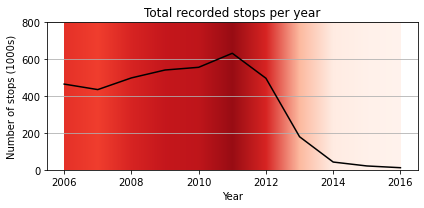

In [106]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(range(2006, 2017), groupby_year.values/1e3, color='k')
ax.set_title('Total recorded stops per year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of stops (1000s)')
ax.grid(axis='y')
ax.bar(xinterp, 1000, color=c.T,width=10/(len(xinterp)-1), alpha=1, align='edge')
ax.set_ylim([0, 800])
cm = plt.cm
fig.tight_layout()
fig.savefig('total_stops.svg', dpi=600)

### Temporal evolution for each city and race

In [13]:
groupby_race_year_city = df.groupby(['race', 'year', 'city']).size()

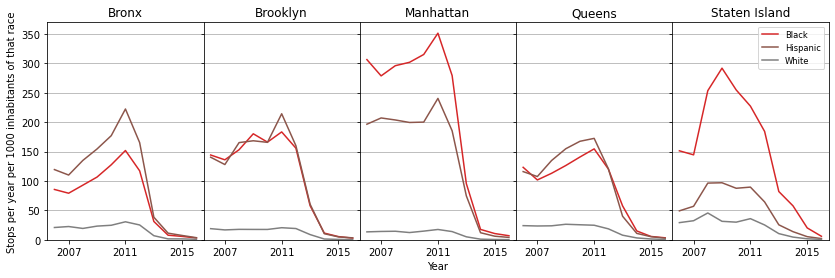

In [14]:
fig, axs = plt.subplots(ncols=len(cities), figsize=(14, 4),sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)
years = range(2006, 2017)
counts = np.zeros((5, 4, len(years)))
for i, city in enumerate(cities):
    axs[i].set_title('{}'.format(city.title()))
    for k, race in enumerate(races):
        counts[i,k, :] = groupby_race_year_city.unstack()[city][[race]].values
        axs[i].plot(years, counts[i,k, :]/census[city][race]*1e3, label=races_dict[race], color=race_colors[k])

        axs[i].set_ylim((0, 370))
        axs[i].set_xticks((2007, 2011, 2015))
        axs[i].grid(axis='y')
axs[4].legend(fontsize='small')
axs[0].set_ylabel('Stops per year per 1000 inhabitants of that race')
axs[2].set_xlabel('Year')
fig.savefig('stops_by_race_and_borough.svg', dpi=600)

## Plotting crimes in cities

In [15]:
groupby_year_city = df.groupby(['year', 'city']).size()
c_data = pd.DataFrame(cities, columns=['City'])
c_data['Total count'] = groupby_year_city.unstack().sum().values * 1000 / [sum(census[city].values()) for city in cities]

# Add custom tooltip to GeoJSON file
with open('crime/new-york-city-boroughs.geojson') as f:
    map_data = f.readlines()
    map_data = [json.loads(line) for line in map_data][0]

for index, row in c_data.iterrows():
    city_name = map_data['features'][index]['properties']['name']
    map_data['features'][index]['properties']['tooltip'] = 'City: {}. Count: {:.0f} per 1000 inhabitants'.format(city_name.title(), c_data[c_data['City'] == city_name]['Total count'].values[0])

In [16]:
m = folium.Map(location=[40.693943, -73.985880], default_zoom_start=14)
choropleth = folium.Choropleth(
    #geo_data='crime/new-york-city-boroughs.geojson',
    geo_data = map_data,
    name="choropleth",
    data=c_data,
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.8,
    columns=['City', 'Total count'],
    key_on="feature.properties.name",
    legend_name="Total stops per 1000 inhabitants",
    bins = [450, 550, 650, 750, 850],
    reset=True,
    ).add_to(m)
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['tooltip'], style=style_function, label=False))

In [17]:
m.save('borough_map.html')

## Plotting crimes in precints

In [18]:
# Open GeoJSON file and add tooltips to the map
with open("crime/nyc-police-precincts.geojson") as f:
    map_data = f.readlines()
    map_data = [json.loads(line) for line in map_data][0]

In [19]:
c_data = pd.DataFrame(df.groupby(['pct']).size(), columns=['crime count']).reset_index()
c_data['crime count'] = c_data['crime count'] / precinct['total'] * 1000
c_data['pct'] = c_data['pct'].apply(str)
for index, row in c_data.iterrows():
    map_data['features'][index]['properties']['tooltip'] = 'Precinct: {}. Count: {:.0f} per 1000 inhabitants'.format(row['pct'], row['crime count'])

In [20]:
m = folium.Map(location=[40.693943, -73.985880], default_zoom_start=20)
choropleth = folium.Choropleth(
    #geo_data='crime/nyc-police-precincts.geojson',
    geo_data=map_data,
    name="choropleth",
    data=c_data[c_data['pct'] != '22'],
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.8,
    columns=['pct', 'crime count'],
    key_on="feature.properties.precinct",
    bins = [0, 500, 1000, 1500, 2000, 5000],
    reset=True,
    ).add_to(m)
#folium.LayerControl().add_to(m)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['tooltip'], style=style_function, label=False))

m
m.save('precinct_map.html')

## Force used by race

In [21]:
# If one of the force-used attributes are 'Y', force was used.
conditions = (df['pf_hands'] == 'Y') | (df['pf_wall'] == 'Y') | (df['pf_grnd'] == 'Y') | (df['pf_drwep'] == 'Y') | (df['pf_ptwep'] == 'Y') | (df['pf_baton'] == 'Y') | (df['pf_hcuff'] == 'Y') | (df['pf_pepsp'] == 'Y')| (df['pf_other'] == 'Y')
df['Force used'] = conditions

In [110]:
df.shape

(3880159, 21)

In [22]:
groupby_race_force = df.groupby(['race', 'Force used']).size().unstack()

In [23]:
force_by_race = groupby_race_force.div(groupby_race_force.sum(axis=1), axis=0)

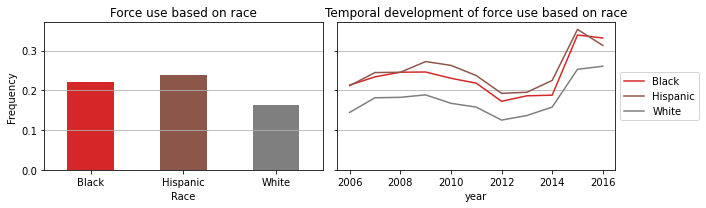

In [24]:
fig, axs = plt.subplots(ncols=2, figsize=(10,3), sharey=True)
force_by_race[True].plot.bar(ylabel='Frequency', xlabel='Race', rot=0, ax=axs[0], color=race_colors)
axs[0].set_xticklabels(labels=[races_dict[i] for i in force_by_race.index])
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[0].set_title('Force use based on race');
axs[0].grid(axis='y')
#fig.tight_layout()
#fig.savefig('force_rate.png', dpi=600)

for k, race in enumerate(races):
    groupby = df[df['race'] == race].groupby(['year', 'Force used']).size().unstack()
    groupby = groupby.div(groupby.sum(axis=1), axis=0)
    groupby.iloc[:, 1].plot.line(y='True', ax=axs[1], label=races_dict[race], color=race_colors[k])
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[1].set_title('Temporal development of force use based on race')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y')
fig.tight_layout()
fig.savefig('force.svg', dpi=600)

In [25]:
force_used = df.groupby(['year', 'race', 'Force used']).size().unstack()
force_used = pd.DataFrame(force_used[True] / force_used.sum(axis=1).values)
force_used = force_used.unstack().T.droplevel(0)
force_used = force_used.reset_index()
force_used.columns = [str(string) for string in force_used.columns]
force_used['race'] = races_list

In [60]:
# Bokeh
colors = palettes.Category20c[len(years)] # Extract a categorical colormap
bokeh_data = ColumnDataSource(force_used) # Transform data for use with Bokeh
p = figure(plot_width=500, plot_height=400, title='Force used rate', x_range=force_used['race'], y_range=[0, 0.4])
bar = {}
legend_items = []
for i, year in enumerate(force_used.columns[1:]):
    # Make a bar plot for crime, and set the alpha and muted alpha.
    bar[year] = p.vbar(x='race', width=0.7, top=year, color=colors[i], source=bokeh_data, alpha=0.5, muted_alpha=0.0, muted=True)
    legend_items.append((str(year), [bar[year]]))
legend = Legend(items=legend_items, location=(5, 0))
p.add_layout(legend, 'right')
p.legend.click_policy="mute"
p.xaxis.axis_label = 'Race'
p.yaxis.axis_label = 'Frequency of force used'
output_file('bokeh_force.html')
save(p)

'/Users/owinton/Documents/DTU/10_semester/socialdata2021/project/bokeh_force.html'

### Frisked

In [27]:
groupby_race_frisk = df.groupby(['race', 'frisked']).size().unstack()

In [28]:
frisk_by_race = groupby_race_frisk.div(groupby_race_frisk.sum(axis=1), axis=0)

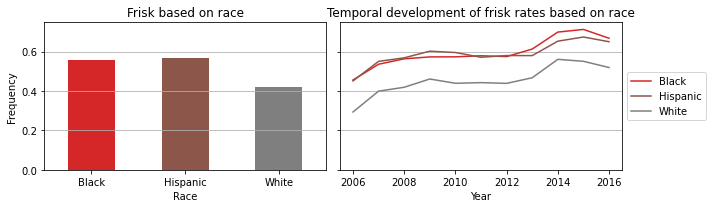

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(10,3), sharey=True)

frisk_by_race[True].plot.bar(ylabel='Frequency', xlabel='Race', ax=axs[0], rot=0, color=race_colors)
axs[0].set_xticklabels(labels=[races_dict[i] for i in force_by_race.index])
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[0].set_title('Frisk based on race');
axs[0].grid(axis='y')
#fig.tight_layout()
#fig.savefig('frisk_rate.png', dpi=600)

for k, race in enumerate(races):
    groupby = df[df['race'] == race].groupby(['year', 'frisked']).size().unstack()
    groupby = groupby.div(groupby.sum(axis=1), axis=0)
    groupby.iloc[:, 1].plot.line(y=True, ax=axs[1], label=races_dict[race], color=race_colors[k])
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[1].set_title('Temporal development of frisk rates based on race')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y')
fig.tight_layout()
fig.savefig('frisk.svg', dpi=600)

In [30]:
frisked = df.groupby(['year', 'race', 'frisked']).size().unstack()
frisked = pd.DataFrame(frisked[True] / frisked.sum(axis=1).values)
frisked = frisked.unstack().T.droplevel(0)
frisked = frisked.reset_index()
frisked.columns = [str(string) for string in frisked.columns]
frisked['race'] = races_list

In [61]:
colors = palettes.Category20c[len(years)] # Extract a categorical colormap
bokeh_data = ColumnDataSource(frisked) # Transform data for use with Bokeh
p = figure(plot_width=500, plot_height=400, title='Frisk rates', x_range=force_used['race'], y_range=[0, 0.8])
bar = {}
legend_items = []
for i, year in enumerate(frisked.columns[1:]):
    # Make a bar plot for crime, and set the alpha and muted alpha.
    bar[year] = p.vbar(x='race', width=0.7, top=year, color=colors[i], source=bokeh_data, alpha=0.5, muted_alpha=0.0, muted=True)
    legend_items.append((str(year), [bar[year]]))
legend = Legend(items=legend_items, location=(5, 0))
p.add_layout(legend, 'right')
p.legend.click_policy="mute"
p.xaxis.axis_label = 'Race'
p.yaxis.axis_label = 'Frequency'
output_file('bokeh_frisk.html')
save(p)

'/Users/owinton/Documents/DTU/10_semester/socialdata2021/project/bokeh_frisk.html'

### Searched

In [32]:
groupby_race_search = df.groupby(['race', 'searched']).size().unstack()

In [33]:
search_by_race = groupby_race_search.div(groupby_race_search.sum(axis=1), axis=0)

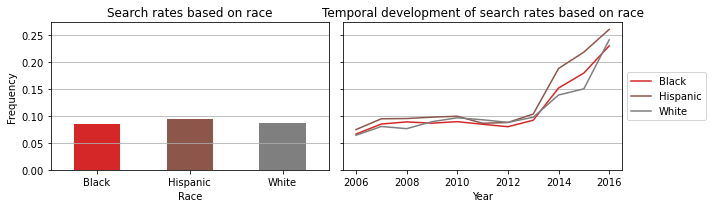

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(10,3), sharey=True)
search_by_race[True].plot.bar(ax=axs[0],ylabel='Frequency', xlabel='Race', rot=0, color=race_colors)
axs[0].set_xticklabels(labels=[races_dict[i] for i in search_by_race.index])
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[0].set_title('Search rates based on race');
axs[0].grid(axis='y')

#fig.tight_layout()
#fig.savefig('search_rate.png', dpi=600)

for k, race in enumerate(races):
    groupby = df[df['race'] == race].groupby(['year', 'searched']).size().unstack()
    groupby = groupby.div(groupby.sum(axis=1), axis=0)
    groupby.iloc[:, 1].plot.line(y=True, ax=axs[1], label=races_dict[race], color=race_colors[k])
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[1].set_title('Temporal development of search rates based on race')
axs[1].set_xlabel('Year')
axs[1].grid(axis='y')
axs[1].set_ylabel('Frequency')
fig.tight_layout()
fig.savefig('search.svg', dpi=600)

In [35]:
searched = df.groupby(['year', 'race', 'searched']).size().unstack()
searched = pd.DataFrame(searched[True] / searched.sum(axis=1).values)
searched = searched.unstack().T.droplevel(0)
searched = searched.reset_index()
searched.columns = [str(string) for string in searched.columns]
searched['race'] = races_list

In [62]:
# Bokeh part for hours
colors = palettes.Category20c[len(years)] # Extract a categorical colormap
bokeh_data = ColumnDataSource(searched) # Transform data for use with Bokeh
p = figure(plot_width=500, plot_height=400, title='Search rates', x_range=searched['race'], y_range=[0, 0.3])
bar = {}
legend_items = []
for i, year in enumerate(searched.columns[1:]):
    bar[year] = p.vbar(x='race', width=0.7, top=year, color=colors[i], source=bokeh_data, alpha=0.5, muted_alpha=0.0, muted=True)
    legend_items.append((str(year), [bar[year]]))
legend = Legend(items=legend_items, location=(5, 0))
p.add_layout(legend, 'right')
p.legend.click_policy="mute"
p.xaxis.axis_label = 'Race'
p.yaxis.axis_label = 'Frequency'
output_file('bokeh_search.html')
save(p)

'/Users/owinton/Documents/DTU/10_semester/socialdata2021/project/bokeh_search.html'

### Arrest made

In [37]:
groupby_race_arrest = df.groupby(['race', 'arstmade']).size().unstack()

In [38]:
arrest_by_race = groupby_race_arrest.div(groupby_race_arrest.sum(axis=1), axis=0)

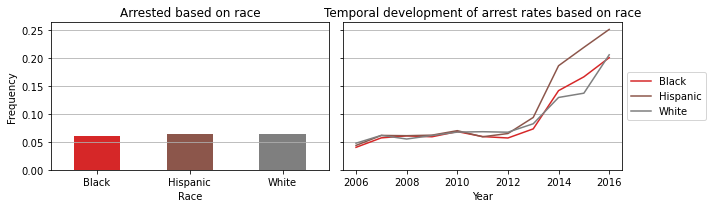

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(10,3), sharey=True)
arrest_by_race[True].plot.bar(ax=axs[0],ylabel='Frequency', xlabel='Race', rot=0, color=race_colors)
axs[0].set_xticklabels(labels=[races_dict[i] for i in arrest_by_race.index])
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[0].set_title('Arrested based on race');
axs[0].grid(axis='y')
#fig.tight_layout()
#plt.savefig('arrest_rate.png', dpi=600)

for k, race in enumerate(races):
    groupby = df[df['race'] == race].groupby(['year', 'arstmade']).size().unstack()
    groupby = groupby.div(groupby.sum(axis=1), axis=0)
    groupby.iloc[:, 1].plot.line(y=True, ax=axs[1], label=races_dict[race], color=race_colors[k])
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[1].set_title('Temporal development of arrest rates based on race')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Frequency of arrest')
axs[1].grid(axis='y')
axs[1].grid(axis='y')
axs[1].grid(axis='y')
fig.tight_layout()
fig.savefig('arrest.svg', dpi=600)

In [40]:
arrested = df.groupby(['year', 'race', 'arstmade']).size().unstack()
arrested = pd.DataFrame(arrested[True] / arrested.sum(axis=1).values)
arrested = arrested.unstack().T.droplevel(0)
arrested = arrested.reset_index()
arrested.columns = [str(string) for string in arrested.columns]
arrested['race'] = races_list

In [63]:
# For arrests
colors = palettes.Category20c[len(years)] # Extract a categorical colormap
bokeh_data = ColumnDataSource(arrested) # Transform data for use with Bokeh
p = figure(plot_width=500, plot_height=400, title='Arrest rates', x_range=searched['race'], y_range=[0, 0.3])
bar = {}
legend_items = []
for i, year in enumerate(searched.columns[1:]):
    # Make a bar plot for crime, and set the alpha and muted alpha.
    bar[year] = p.vbar(x='race', width=0.7, top=year, color=colors[i], source=bokeh_data, alpha=0.5, muted_alpha=0.0, muted=True)
    legend_items.append((str(year), [bar[year]]))
legend = Legend(items=legend_items, location=(5, 0))
p.add_layout(legend, 'right')
p.legend.click_policy="mute"
p.xaxis.axis_label = 'Race'
p.yaxis.axis_label = 'Frequency of arrest'
output_file('bokeh_arrest.html')
save(p)

'/Users/owinton/Documents/DTU/10_semester/socialdata2021/project/bokeh_arrest.html'

## Machine learning part

Preparation of features and target. Predict arrest made based on key features.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


In [43]:
df.columns

Index(['year', 'pct', 'arstmade', 'frisked', 'searched', 'pistol', 'pf_hands',
       'pf_grnd', 'pf_wall', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff',
       'pf_pepsp', 'pf_other', 'cs_cloth', 'sex', 'race', 'age', 'city',
       'Force used'],
      dtype='object')

In [44]:
target = 'arstmade'
y=pd.DataFrame()
y[target]=df[target]

X=pd.DataFrame()               
X['age']=df['age']
X['searhced']=df['searched']
X['frisked']=df['frisked']
X['pistol']=df['pistol']
X['force used'] = df['Force used']
X['cs_cloth'] = df['cs_cloth']
X = X.replace((True, False), (1, 0))
sex = pd.get_dummies(df['sex'])
race = pd.get_dummies(df['race'])

In [45]:
X = pd.concat((X, sex, race, y), axis=1)
#X = pd.concat((X, y), axis=1)
X = X.astype('uint8')

X_majority = X[X[target] == 0]
X_minority = X[X[target] == 1]
X_majority_downsampled = resample(X_majority, replace=False, n_samples=len(X_minority))
X = pd.concat((X_minority, X_majority_downsampled))
y = X[target]
X = X.drop(target, axis=1)

Make a balanced dataset. Downsampling majority class

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [47]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train.values.ravel())

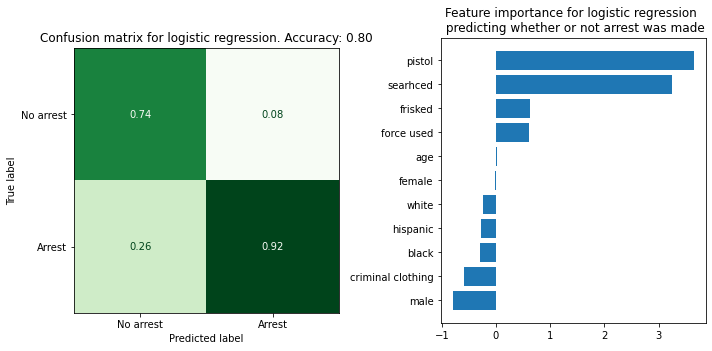

In [48]:
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
plot_confusion_matrix(LR, X_test, y_test, normalize='pred', display_labels=['No arrest', 'Arrest'], colorbar=False, cmap='Greens', ax=ax[0])
ax[0].set_title('Confusion matrix for logistic regression. Accuracy: {:.2f}'.format(LR.score(X_test, y_test)));


sortidx = LR.coef_[0].argsort()
labels = X.columns.values
labels[6] = 'female'
labels[10] = 'white'
labels[9] = 'hispanic'
labels[8] = 'black'
labels[5] = 'criminal clothing'
labels[7] = 'male'

ax[1].barh(labels[sortidx], LR.coef_[0][sortidx])
ax[1].set_title('Feature importance for logistic regression \n predicting whether or not arrest was made')
fig.tight_layout()
fig.savefig('machine_learning.svg', dpi=600)

In [49]:
RF = RandomForestClassifier().fit(X_train, y_train.values.ravel())

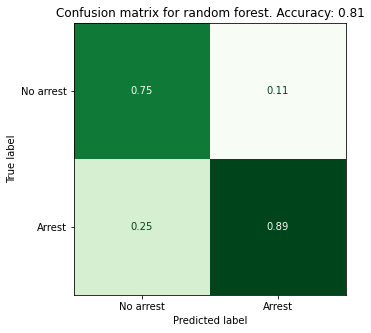

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(RF, X_test, y_test, normalize='pred', display_labels=['No arrest', 'Arrest'], colorbar=False, cmap='Greens', ax=ax)
ax.set_title('Confusion matrix for random forest. Accuracy: {:.2f}'.format(RF.score(X_test, y_test)));

<ipython-input-51-c14ee020e5cf>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X.columns, rotation=45)


[Text(0, 0, 'age'),
 Text(1, 0, 'searhced'),
 Text(2, 0, 'frisked'),
 Text(3, 0, 'pistol'),
 Text(4, 0, 'force used'),
 Text(5, 0, 'criminal clothing'),
 Text(6, 0, 'female'),
 Text(7, 0, 'male'),
 Text(8, 0, 'black'),
 Text(9, 0, 'hispanic'),
 Text(10, 0, 'white')]

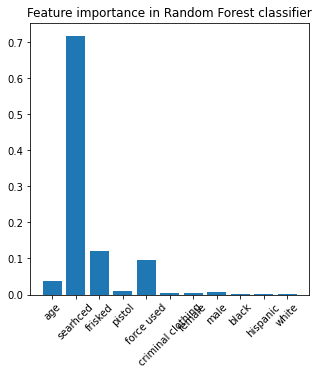

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(X.columns, RF.feature_importances_)
ax.set_title('Feature importance in Random Forest classifier')
ax.set_xticklabels(X.columns, rotation=45)